Real Or Not? NLP with Disaster Tweets

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import nltk

In [55]:
import re 

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [56]:
import plotly.express as px

In [57]:
#nltk.download_shell()

In [58]:
tweets=[line.strip() for line in open('/home/pitzm/Dokumentumok/Data Science/Kaggle/NLP/nlp-getting-started/train.csv')]

Exploring data:

In [59]:
print(len(tweets))

8562


In [60]:
tweets[0]

'id,keyword,location,text,target'

In [61]:
tweets[2]

'4,,,Forest fire near La Ronge Sask. Canada,1'

In [62]:
for tweet_no, tweet in enumerate(tweets[:20]):
    print(tweet_no, tweet)
    print('\n')

0 id,keyword,location,text,target


1 1,,,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1


2 4,,,Forest fire near La Ronge Sask. Canada,1


3 5,,,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1


4 6,,,"13,000 people receive #wildfires evacuation orders in California ",1


5 7,,,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ,1


6 8,,,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1


7 10,,,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1


8 13,,,I'm on top of the hill and I can see a fire in the woods...,1


9 14,,,There's an emergency evacuation happening now in the building across the street,1


10 15,,,I'm afraid that the tornado is coming to our area...,1


11 16,,,Three people died from the heat wave so far,1


1

Import data as dataframe:

In [63]:
tweets=pd.read_csv('/home/pitzm/Dokumentumok/Data Science/Kaggle/NLP/nlp-getting-started/train.csv', sep=',', names=['id','keyword', 'location','text','target'])

In [64]:
test=pd.read_csv('/home/pitzm/Dokumentumok/Data Science/Kaggle/NLP/nlp-getting-started/test.csv', sep=',', names=['id','keyword', 'location','text'])

In [65]:
tweets.head()

,id,keyword,location,text,target
0,id,keyword,location,text,target
1,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
2,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
3,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
4,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1


In [66]:
test.head()

,id,keyword,location,text
0,id,keyword,location,text
1,0,NaN,NaN,Just happened a terrible car crash
2,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
4,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires


In [67]:
tweets=tweets.drop(0)

In [68]:
test=test.drop(0)

In [69]:
tweets.groupby('target').describe().transpose()

target                                                           0  \
id       count                                                4342   
         unique                                               4342   
         top                                                  4670   
         freq                                                    1   
keyword  count                                                4323   
         unique                                                218   
         top                                           body%20bags   
         freq                                                   40   
location count                                                2884   
         unique                                               2142   
         top                                              New York   
         freq                                                   55   
text     count                                                4342   
         unique                                               4315   
         top     He came to a land which was engulfed in tribal...   
         freq                                                    4   

target                                                           1  
id       count                                                3271  
         unique                                               3271  
         top                                                   738  
         freq                                                    1  
keyword  count                                                3229  
         unique                                                220  
         top                                            derailment  
         freq                                                   39  
location count                                                2196  
         unique                                               1513  
         top                                                   USA  
         freq                                                   67  
text     count                                                3271  
         unique                                               3206  
         top     11-Year-Old Boy Charged With Manslaughter of T...  
         freq                                                   10

Feature engineering:

In [70]:
tweets['length']=tweets['text'].apply(len)
test['length']=test['text'].apply(len)


In [71]:
tweets['length'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [72]:
tweets[tweets['length']==7]['text'].iloc[0]

'Crushed'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fb16709d0>,
      dtype=object)

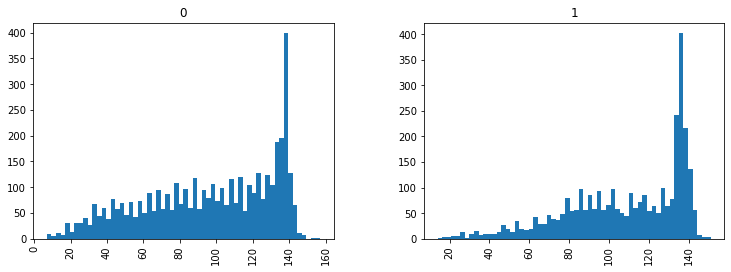

In [73]:
tweets.hist(column='length', by='target', bins=60, figsize=(12,4))

In [74]:
tweets['length'].value_counts()

136    401
139    275
138    256
140    218
137    210
      ... 
150      2
151      1
152      1
149      1
157      1
Name: length, Length: 147, dtype: int64

In [75]:
tweets[tweets['length']==136]['text'].head(20)

86     Carolina accident: Motorcyclist Dies in I-540 ...
98     #BREAKING: there was a deadly motorcycle car a...
123    That moment when you get on a scary roller coa...
136    Anyone need a P/U tonight? I play Hybrid Slaye...
137    Experts in France begin examining airplane deb...
138    Strict liability in the context of an airplane...
140    Experts in France begin examining airplane deb...
148    Experts in France begin examining airplane deb...
152    Experts in France begin examining airplane deb...
159    DTN Brazil: Experts in France begin examining ...
160    Experts in France begin examining airplane deb...
162    + Nicole Fletcher one of a victim of crashed a...
165    Experts in France begin examining airplane deb...
171    Could a drone cause an airplane accident? Pilo...
177    Anyone travelling Aberystwyth-Shrewsbury right...
219    Cop pulls drunk driver to safety SECONDS befor...
221    Cop pulls drunk driver to safety SECONDS befor...
239    Cop pulls drunk driver t

In [76]:
tweets[tweets['length']==136]['text'].iloc[6]

'Experts in France begin examining airplane debris found on Reunion Island: French air accident experts on Wedn... http://t.co/bKpFpOGySI'

In [77]:
tweets.groupby('text').count()['id'].sort_values(ascending=False)

text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               6
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
                                                                                                                                                ..
OSP concerned about mounting fatalities http://t.co/YmP0gInwza http://t.co/FYIOQvIOif                            

Text processing:

In [78]:
import string

In [79]:
from nltk.corpus import stopwords

In [80]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [81]:
def clean_text(text):
    text = re.sub('\s+', ' ', text).strip() 
    return text

In [82]:
def text_process(tweet):
    nopunc=[char for char in tweet if char not in string.punctuation]
    nopunc=''.join(nopunc)
    nopunc=nopunc.replace('https?://\S+|www\.\S+','').replace('<.*?>','').replace("'","").replace("x89Û'", "")
    remove_emoji(nopunc)
    clean_text(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [83]:
tweets['text'].head(5).apply(text_process)

1    [Deeds, Reason, earthquake, May, ALLAH, Forgiv...
2        [Forest, fire, near, La, Ronge, Sask, Canada]
3    [residents, asked, shelter, place, notified, o...
4    [13000, people, receive, wildfires, evacuation...
5    [got, sent, photo, Ruby, Alaska, smoke, wildfi...
Name: text, dtype: object

In [84]:
tweets['clean_text'] = tweets['text'].apply(lambda x:text_process(x))

In [85]:
real=pd.DataFrame()

In [86]:
real['real']=tweets[tweets['target']=='1']['clean_text']

In [87]:
real.head()

,real
1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
2,"[Forest, fire, near, La, Ronge, Sask, Canada]"
3,"[residents, asked, shelter, place, notified, o..."
4,"[13000, people, receive, wildfires, evacuation..."
5,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


In [88]:
#real=real.drop('real_text', axis=1)

In [89]:
real.head()

,real
1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
2,"[Forest, fire, near, La, Ronge, Sask, Canada]"
3,"[residents, asked, shelter, place, notified, o..."
4,"[13000, people, receive, wildfires, evacuation..."
5,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


In [90]:
false=pd.DataFrame()
false['false']=tweets[tweets['target']=='0']['clean_text']

In [91]:
topreal = Counter([item for sublist in real['real'] for item in sublist])
temp = pd.DataFrame(topreal.most_common(25))
temp.columns = ['Common_words_real','count']
temp.style.background_gradient(cmap='Blues')


,Common_words_real,count
0,fire,126
1,via,119
2,California,108
3,amp,106
4,people,94
5,News,89
6,killed,87
7,like,86
8,Hiroshima,84
9,suicide,76


In [92]:
fig = px.treemap(temp, path=['Common_words_real'], values='count',title='Tree of Most Common Words if there is a Real Disaster')
fig.show()

In [93]:
topfalse = Counter([item for sublist in false['false'] for item in sublist])
temp = pd.DataFrame(topfalse.most_common(25))
temp.columns = ['Common_words_false','count']
temp.style.background_gradient(cmap='Blues')


,Common_words_false,count
0,like,235
1,Im,196
2,amp,192
3,get,143
4,dont,102
5,one,99
6,via,94
7,would,87
8,new,86
9,2,86


In [94]:
fig = px.treemap(temp, path=['Common_words_false'], values='count',title='Tree of Most Common Words if there is no Real Disaster')
fig.show()

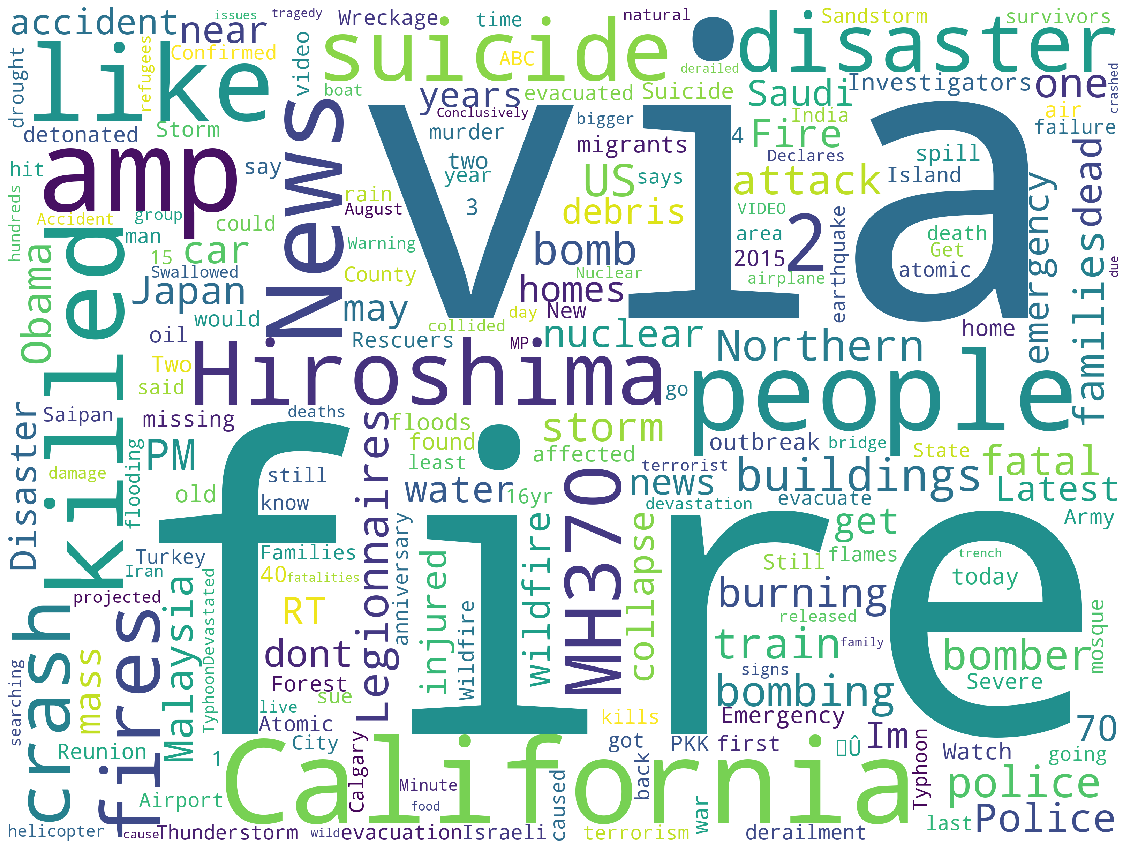

In [95]:
wc = WordCloud(background_color="white", width=3200, height=2400)
cloud = wc.generate_from_frequencies(dict(topreal))
plt.figure(figsize=(20, 16))
plt.axis('off')
plt.imshow(cloud)
plt.show()

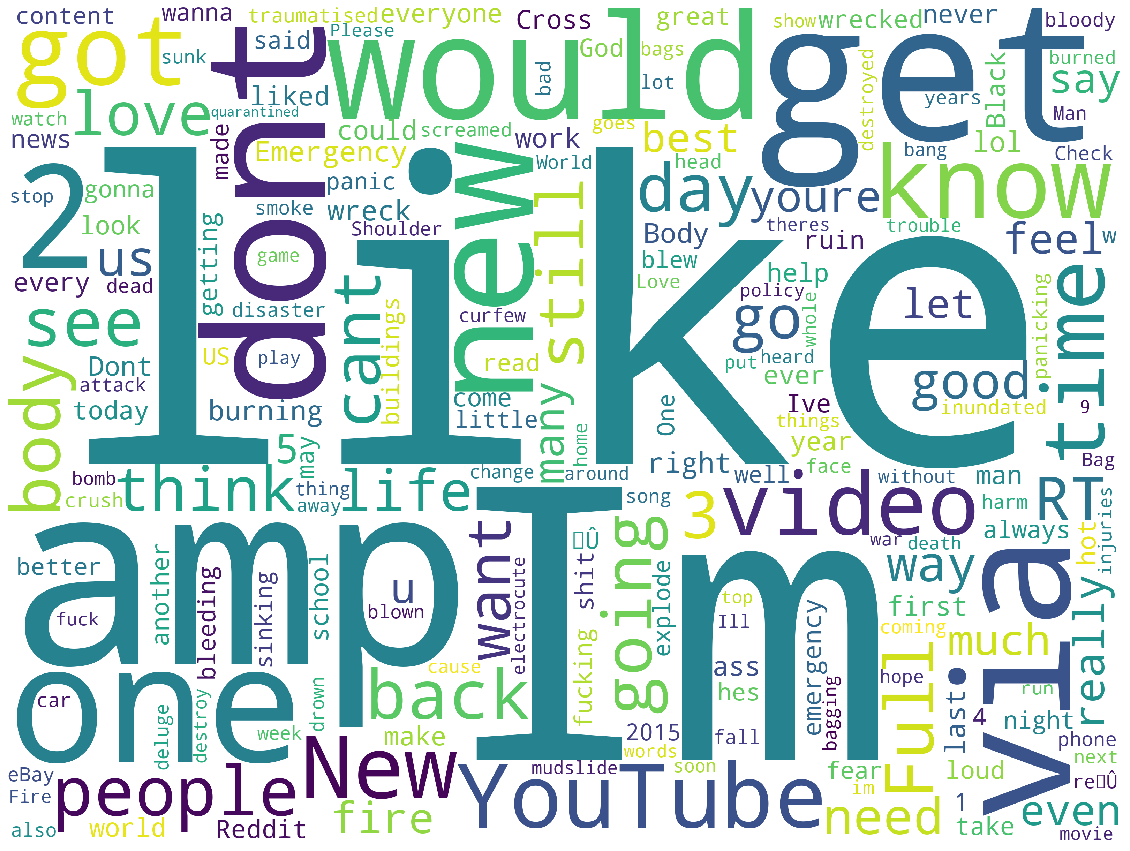

In [96]:
wc = WordCloud(background_color="white", width=3200, height=2400)
cloud = wc.generate_from_frequencies(dict(topfalse))
plt.figure(figsize=(20, 16))
plt.axis('off')
plt.imshow(cloud)
plt.show()

Vectorization:

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(tweets['text'])

In [99]:
print(len(bow_transformer.vocabulary_))

26473


In [100]:
bow_transformer.get_feature_names()[5621]

'Jam'

In [101]:
tweets_bow=bow_transformer.transform(tweets['text'])
test_bow=bow_transformer.transform(test['text'])

In [102]:
test_bow.shape

(3263, 26473)

In [103]:
tweets_bow.shape

(7613, 26473)

In [104]:
tweets_bow.nnz

75006

Term frequency - inverse document frequency:

In [105]:
from sklearn.feature_extraction.text import TfidfTransformer

In [106]:
tfidf_Transformer=TfidfTransformer().fit(tweets_bow)

In [107]:
tweets_tfidf=tfidf_Transformer.transform(tweets_bow)
test_tfidf=tfidf_Transformer.transform(test_bow)

Multinomial Naive Bayes model:

In [108]:
from sklearn.naive_bayes import MultinomialNB

In [109]:
disaster_detect_model=MultinomialNB().fit(tweets_tfidf, tweets['target'])

Prediction:

In [110]:
prediction=disaster_detect_model.predict(test_tfidf)

In [111]:
prediction

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U1')

In [112]:
test['target']=prediction

In [113]:
result=test[['id', 'target']]

In [114]:
result.head()

,id,target
1,0,1
2,2,1
3,3,1
4,9,1
5,11,1


In [115]:
result.to_csv(r'/home/pitzm/Dokumentumok/Data Science/Kaggle/NLP/result.csv',index=False)

Kaggle score: 0.82